In [156]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#### In this notebook, I will explore my data through visualizations and statistics, as well as Count Vectorize the text and explore that data as well

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
# read in data
book_data = pd.read_csv('../data/book_data.csv')

In [5]:
# remove unnamed columns
book_data.drop(columns='Unnamed: 0', inplace=True)

In [98]:
# drop rows with na values. These are rows with no words to lemmatize from the previous notebook
book_data.dropna(inplace=True)

### Word and Character Count Visualizations and Statistics

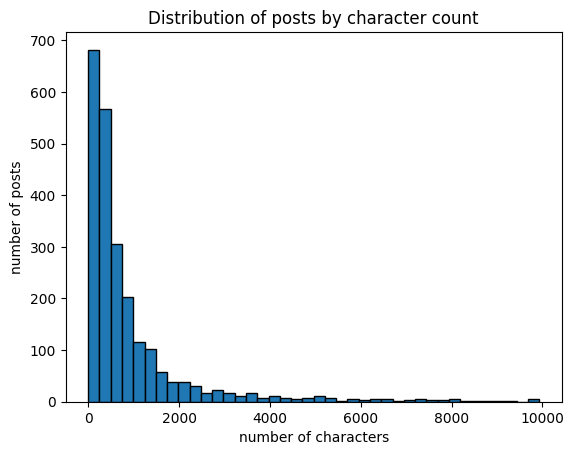

In [9]:
# Histogram of character counts. For easier visualization posts over 10000 are removed
plt.xlabel('number of characters')
plt.ylabel('number of posts')
plt.title('Distribution of posts by character count')
plt.hist(book_data['char_count'][book_data['char_count']<10000], bins=40, edgecolor='black');

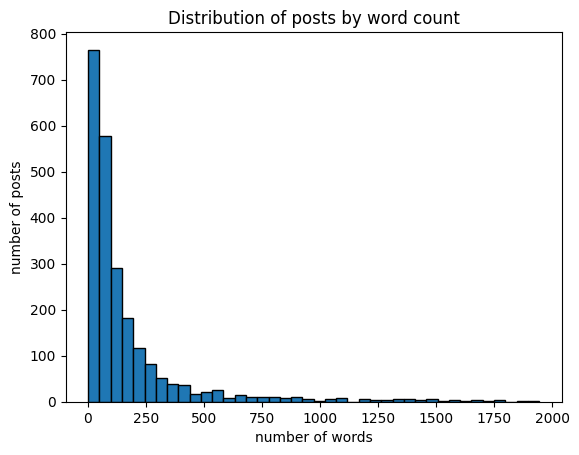

In [12]:
# Histogram of word counts. For easier visualization posts over 2000 are removed
plt.xlabel('number of words')
plt.ylabel('number of posts')
plt.title('Distribution of posts by word count')
plt.hist(book_data['word_count'][book_data['word_count']<2000], bins=40, edgecolor='black');

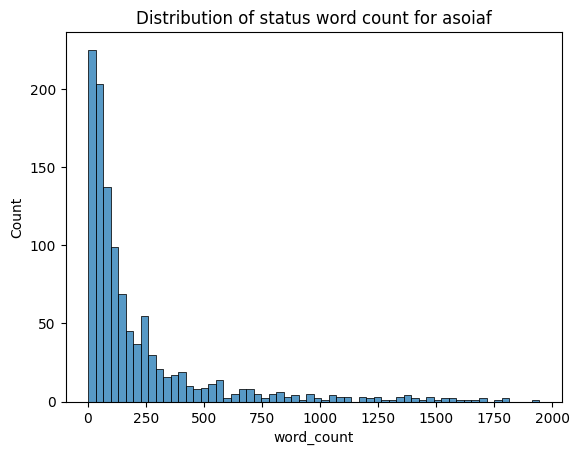

In [163]:
# hist of asoiaf word counts
data=book_data[book_data['subreddit']=='asoiaf']
plt.title('Distribution of status word count for asoiaf')
sns.histplot(data=data['word_count'][data['word_count']<2000], bins=60);

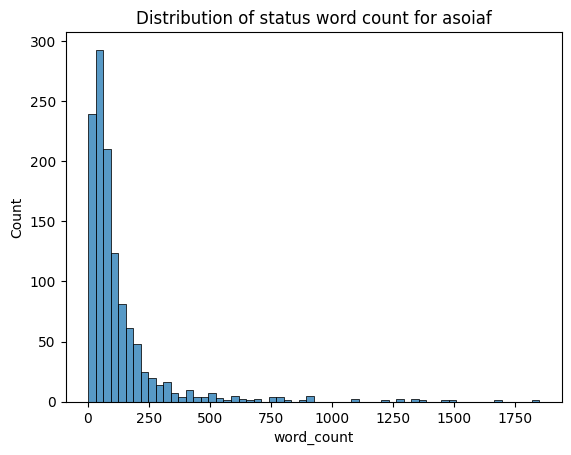

In [164]:
# hist of stormlight word counts
data=book_data[book_data['subreddit']=='Stormlight_Archive']
plt.title('Distribution of status word count for asoiaf')
sns.histplot(data=data['word_count'][data['word_count']<2000], bins=60);

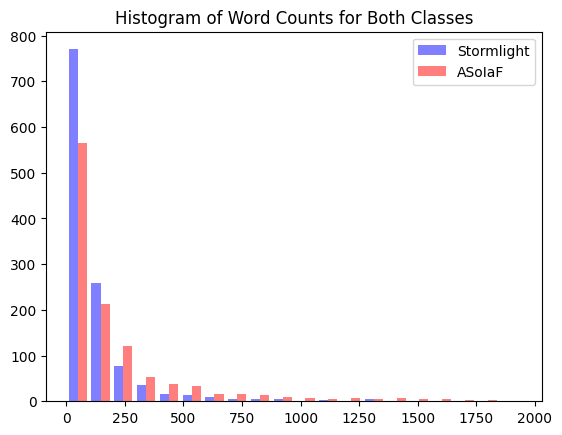

In [189]:
# Histogram of word counts for both subreddits. Not show are outliers over 2000
data1=book_data[book_data['subreddit']=='Stormlight_Archive']
data2=book_data[book_data['subreddit']=='asoiaf']
plt.title('Histogram of Word Counts for Both Classes')
plt.hist([data1['word_count'][data1['word_count']<2000], data2['word_count'][data2['word_count']<2000]], color=['b','r'], alpha=0.5, bins=20)
plt.legend(labels=['Stormlight', 'ASoIaF']);

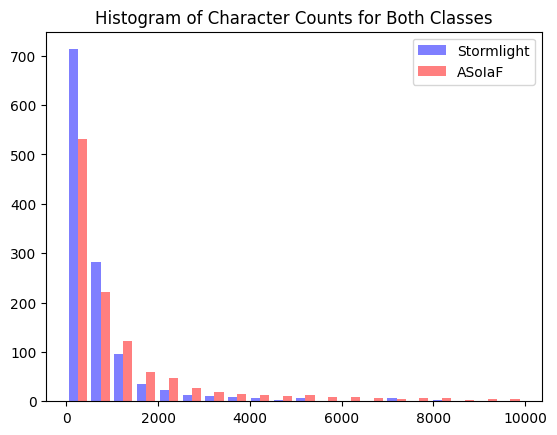

In [190]:
# Histogram of character counts for both subreddits. Not show are outliers over 10000
data1=book_data[book_data['subreddit']=='Stormlight_Archive']
data2=book_data[book_data['subreddit']=='asoiaf']
plt.title('Histogram of Character Counts for Both Classes')
plt.hist([data1['char_count'][data1['char_count']<10000], data2['char_count'][data2['char_count']<10000]], color=['b','r'], alpha=0.5, bins=20)
plt.legend(labels=['Stormlight', 'ASoIaF']);

It appears that the vast majority of posts are short; less than 250 words and 2000 characters. There are few outliers that range much higher into 10,000s of characters and 1,000s of words

In [199]:
gt_words = book_data['word_count'][book_data['subreddit']=='asoiaf']
sa_words = book_data['word_count'][book_data['subreddit']=='Stormlight_Archive']
gt_words = book_data['char_count'][book_data['subreddit']=='asoiaf']
sa_words = book_data['char_count'][book_data['subreddit']=='Stormlight_Archive']

In [35]:
# Show average word and character counts per class
display(book_data.groupby('subreddit').mean())

,char_count,word_count
subreddit,,
Stormlight_Archive,829.953393,145.645135
asoiaf,1629.948962,285.720588


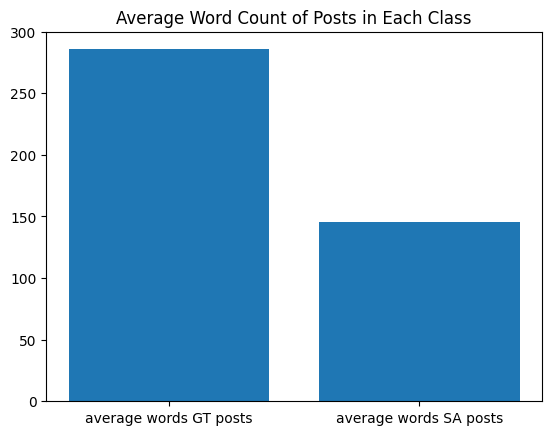

In [194]:
plt.title('Average Word Count of Posts in Each Class')
plt.bar(['average words GT posts', 'average words SA posts'], [gt_words, sa_words]);

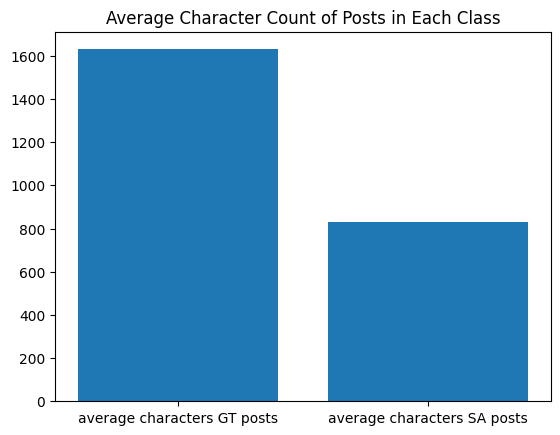

In [34]:
plt.title('Average Character Count of Posts in Each Class')
plt.bar(['average characters GT posts', 'average characters SA posts'], [gt_char, sa_char]);

As seen in the visualizations above, GT posts are on average twice as long as SA posts

#### Define X, y and Train Test Sets

In [100]:
# Define X and y
X = book_data[['lemmatized_words']]
y = book_data['subreddit']

In [101]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16, stratify=y)

### Count Vectorization and Tfidf Vectorization
#### This will be used for modelling in the next notebook, but used for EDA here. The same random state will be used to preserve the data

In [102]:
# define custom stop words. English stop words have already been removed
# these mostly consist of words that appear in reddit posts but have little to do with the actual text.
# many are related to links and reddit text formatting
book_stopwords = ['like', 'reddit', 'https', 'view', 'http', 'gt', 'lt', 'www', 'amp', 'x200b', 'imgur', 'com', 'org', 'index', 'php', 'poll']

In [123]:
# Instantiate Count Vectorizer for ngrams = 1
cvec = CountVectorizer(max_features=4000, stop_words=book_stopwords, ngram_range=(1,1))

In [124]:
# Fit and Transform book train data
train_cv = cvec.fit_transform(X_train['lemmatized_words'])

In [125]:
# Convert to DataFrame
train_cv_df = pd.DataFrame(train_cv.todense(), columns=cvec.get_feature_names())

/home/mark/Python/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


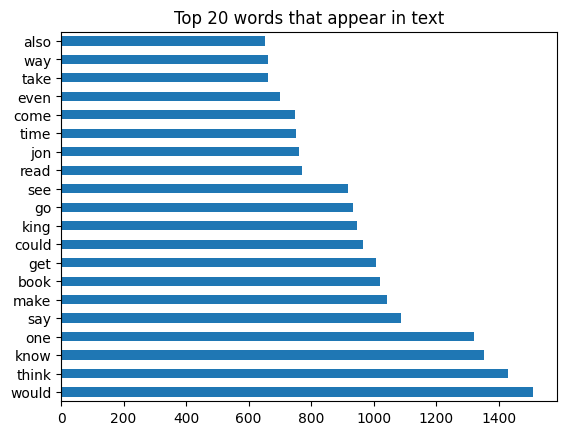

In [126]:
# Plot top occuring words
plt.title('Top 20 words that appear in text')
train_cv_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

In [129]:
# Instantiate Count Vectorizer for ngrams = 2
cvec = CountVectorizer(max_features=4000, min_df=2, stop_words=book_stopwords, ngram_range=(2,2))

In [130]:
# Fit and Transform book train data
train_cv = cvec.fit_transform(X_train['lemmatized_words'])

In [131]:
# Convert to DataFrame
train_cv_df = pd.DataFrame(train_cv.todense(), columns=cvec.get_feature_names())

/home/mark/Python/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


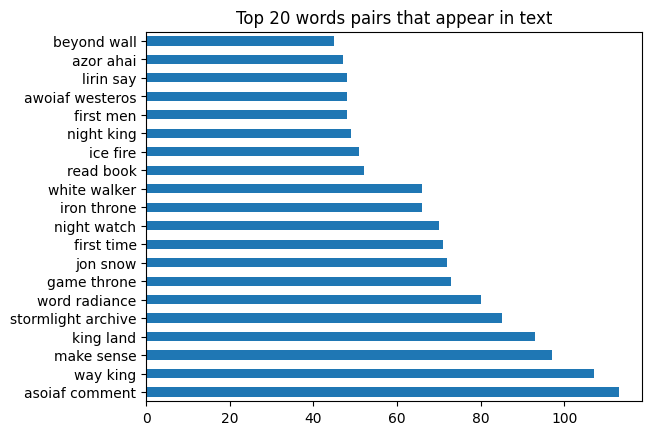

In [132]:
# Plot top occuring word pairs
plt.title('Top 20 word pairs that appear in text')
train_cv_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

#### Tfidf Vectorization

In [142]:
# Instantiate Tfidf Vectorizer for ngrams = 1
tvec = TfidfVectorizer(max_features = 4000, stop_words = book_stopwords, ngram_range=(1,1))

In [143]:
# Fit and Transform book train data
train_cv = tvec.fit_transform(X_train['lemmatized_words'])

In [144]:
# Convert to DataFrame
train_cv_df = pd.DataFrame(train_cv.todense(), columns=tvec.get_feature_names())

/home/mark/Python/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


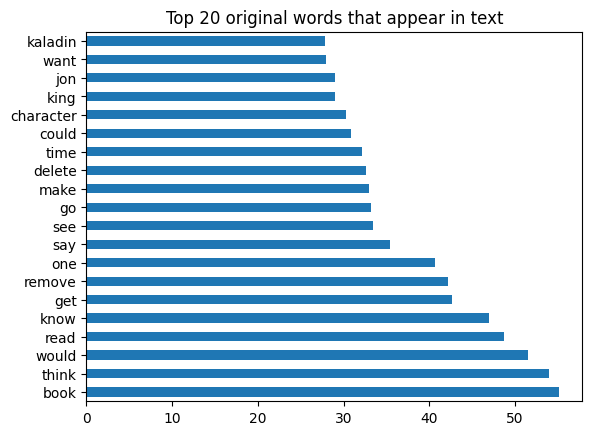

In [147]:
# Plot top occuring word pairs
plt.title('Top 20 original words that appear in text')
train_cv_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

In [148]:
# Instantiate Tfidf Vectorizer for ngrams = 2
tvec = TfidfVectorizer(max_features = 4000, stop_words = book_stopwords, ngram_range=(2,2))

In [149]:
# Fit and Transform book train data
train_cv = tvec.fit_transform(X_train['lemmatized_words'])

In [150]:
# Convert to DataFrame
train_cv_df = pd.DataFrame(train_cv.todense(), columns=tvec.get_feature_names())

/home/mark/Python/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


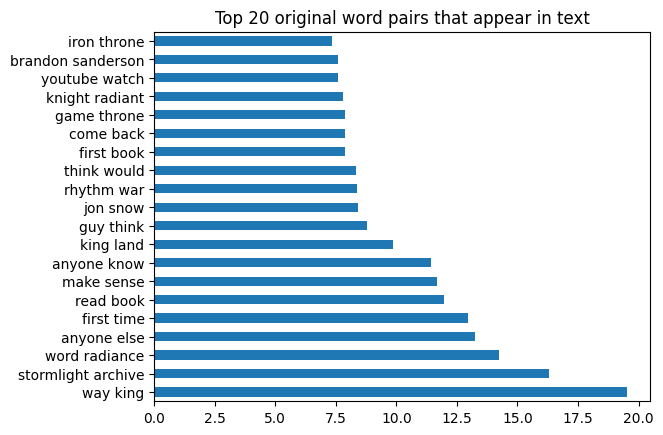

In [153]:
# Plot top occuring word pairs
plt.title('Top 20 original word pairs that appear in text')
train_cv_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');